<b><u><font size="6">A.5</font></u></b>

In [15]:
import numpy as np

def Euclidean(vec1, vec2):
    if len(vec1) == len(vec2):
        distance = 0;
        for i in range(0, len(vec1)):
            distance = distance + ((vec1[i] - vec2[i]) ** 2)
        distance = distance ** .5
        return distance
    else:
        return None
            

In [16]:
x = np.random.rand(7,1)
y = np.random.rand(7,1)

distance = Euclidean(x, y)
print(distance)


[0.90352673]


<b><u><font size="6">A.6</font></u></b>

In [17]:
def Manhattan(vec1, vec2):
    if len(vec1) == len(vec2):
        distance = 0;
        for i in range(0, len(vec1)):
            distance = distance + abs(vec1[i] - vec2[i])
        return distance
    else:
        return None

In [18]:
x = np.random.rand(2,1)
y = np.random.rand(2,1)

distance = Manhattan(x, y)
print(distance)

[1.34044211]


<b><u><font size="6">A.7</font></u></b>

In [19]:
def Accuracy(vec1, vec2):
    if len(vec1) == len(vec2):
        intersect = 0;
        for i in range(0, len(vec1)):
            if vec1[i] == vec2[i]:
                intersect+=1
        return intersect/len(vec1)
    else:
        return None
    
def Generalization(vec1, vec2):
    return

In [20]:
from sklearn.metrics import accuracy_score
y_pred = [0, 2, 1, 3]
y_true = [0, 1, 2, 3]
distance = Accuracy(y_pred, y_true)
print(distance)

0.5


<b><u><font size="6">A.8</font></u></b>

In [21]:
def precision(y_true, y_pred):
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for i in range(0, len(y_true)):
        if y_true[i] == 0 and y_pred[i] == 0:
            TN+=1
        elif y_true[i] == 0 and y_pred[i] == 1:
            FP+=1
        elif y_true[i] == 1 and y_pred[i] == 0:
            FN+=1
        elif y_true[i] == 1 and y_pred[i] == 1:
            TP+=1
    return TP/(TP+FP)

def recall(y_true, y_pred):
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for i in range(0, len(y_true)):
        if y_true[i] == 0 and y_pred[i] == 0:
            TN+=1
        elif y_true[i] == 0 and y_pred[i] == 1:
            FP+=1
        elif y_true[i] == 1 and y_pred[i] == 0:
            FN+=1
        elif y_true[i] == 1 and y_pred[i] == 1:
            TP+=1
    return TP/(TP+FN)

def f1(y_true, y_pred):
    prec = precision(y_true, y_pred)
    rec = recall(y_true, y_pred)
    return 2*((prec*rec)/(prec+rec))

In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score
y_true = [1, 0, 1, 1, 0, 1]
y_pred = [0, 0, 1, 1, 0, 1]

print(precision_score(y_true, y_pred))
print(recall_score(y_true, y_pred))
print(f1_score(y_true, y_pred))
print(precision(y_true, y_pred))
print(recall(y_true, y_pred))
print(f1(y_true, y_pred))

1.0
0.75
0.8571428571428571
1.0
0.75
0.8571428571428571


<b><u><font size="6">A.9</font></u></b>

In [23]:
def confusion(y_true, y_pred):
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for i in range(0, len(y_true)):
        if y_true[i] == 0 and y_pred[i] == 0:
            TN+=1
        elif y_true[i] == 0 and y_pred[i] == 1:
            FP+=1
        elif y_true[i] == 1 and y_pred[i] == 0:
            FN+=1
        elif y_true[i] == 1 and y_pred[i] == 1:
            TP+=1
    return np.array([[TN,FP],[FN,TP]])

In [24]:
from sklearn.metrics import confusion_matrix
y_true = [1, 1, 1, 1, 0, 1, 0, 1, 1, 0]
y_pred = [0, 0, 1, 1, 0, 1, 1, 1, 0, 1]
print(confusion_matrix(y_true, y_pred))
print(confusion(y_true, y_pred))

[[1 2]
 [3 4]]
[[1 2]
 [3 4]]


<b><u><font size="6">A.10</font></u></b>

AUC=0.604


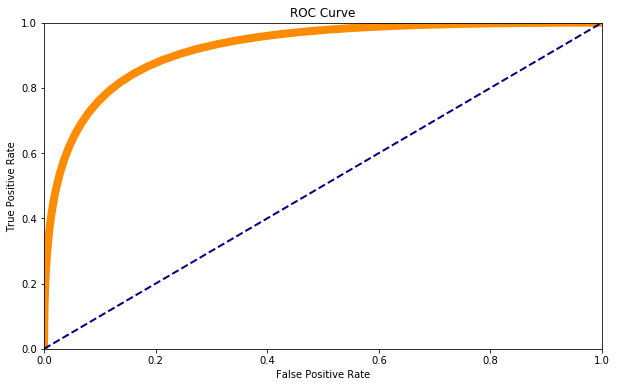

In [105]:
import matplotlib.pyplot as plt

#for testing
def distribution(x, std, mean):
    const = 1.0 / np.sqrt(2*np.pi*(std**2))
    pdf_normal_dist = const*np.exp(-((x-mean)**2)/(2.0*(std**2)))
    return pdf_normal_dist
    
x = np.linspace(0, 1, num=100)
good_test = distribution(x,0.1,0.4)
bad_test = distribution(x,0.1,0.6)

fig = plt.figure(figsize=(10, 6))
    
def roc_curve(y_train, y_scores, label=None):
    total_bad = np.sum(y_train)
    total_good = np.sum(y_scores)
    
    cum_tp = 0
    cum_fp = 0
    
    tpr_list = []
    fpr_list = []
    
    for i in range(len(y_train)):
        if bad_pdf[i] > 0:
            cum_tp += bad_pdf[len(x)-1-i]
            cum_fp += good_pdf[len(x)-1-i]
        fpr = cum_fp / total_good
        tpr = cum_tp / total_bad
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    auc=np.sum(tpr_list)/100
    plt.plot(fpr_list, tpr_list, color='darkorange', linewidth=8, label=label)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.axis([0, 1, 0, 1])
    plt.title("ROC Curve")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    print("AUC=%.3f"%auc)
    
roc_curve(good_test, bad_test)


<b><u><font size="6">A.11</font></u></b>

<b><u><font size="6">A.12</font></u></b>

<b><u><font size="6">A.13</font></u></b>

In [12]:
import operator

class knn:
    def __init__(self):
        pass
    
    def fit(self, training_features, training_labels, k, distance_f, kwargs):
        self.training_features = training_features
        self.training_labels = training_labels
        self.k = k
        self.distance_f = distance_f
        self.kwargs = kwargs
        
    def predict(self, test_features):
        pred = []
        for test in test_features:
            distances = []
            i=0
            for train in self.training_features:
                dist=0
                dist = self.distance_f(test, train)
                
                tmp = (train, dist, self.training_labels[i])
                distances.append(tmp)
                i+=1
            distances.sort(key=operator.itemgetter(1))
            neighbors = distances[:self.k]
            count=0

            for nn in neighbors:
                if nn[2] == 1:
                    count+=1
            score = count/self.k
            if score > .6:
                pred.append(1)
            else:
                pred.append(0)
        return pred

In [13]:
labels = np.array([1,1,1,0,0])
trainset = np.array([[0,0,0,0,0],[0,0,1,0,0],[1,0,0,1,0],[1,0,1,0,1],[0,1,1,1,1]])
testinstance = np.array([[1,0,1,0,1],[1,1,1,1,1]])
k = 3

kn = knn()
kn.fit(trainset,labels,k,Euclidean,0)
kn.predict(testinstance)

[1, 0]

<b><u><font size="6">B.14</font></u></b>

In [8]:
import pandas as pd
import numpy as np

df = pd.read_csv('/Users/Nick/datasets/DataScienceRepository/winequality-white.csv')
df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


<b><u><font size="6">B.15</font></u></b>

In [10]:
dfY = df['quality'].between(6, 10).astype(np.int)
dfY.describe()
#dfX = df.drop(columns=['quality'])

count    4898.000000
mean        0.665169
std         0.471979
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: quality, dtype: float64

<b><u><font size="6">B.16</font></u></b>

In [24]:
print(df['fixed acidity'].describe())
print("\n")
print(df['volatile acidity'].describe())
print("\n")
print(df['citric acid'].describe())
print("\n")
print(df['residual sugar'].describe())
print("\n")
print(df['chlorides'].describe())
print("\n")
print(df['free sulfur dioxide'].describe())
print("\n")
print(df['total sulfur dioxide'].describe())
print("\n")
print(df['density'].describe())
print("\n")
print(df['pH'].describe())
print("\n")
print(df['sulphates'].describe())
print("\n")
print(df['alcohol'].describe())
print("\n")
print(df['quality'].describe())

4898.0


count    4898.000000
mean        0.278241
std         0.100795
min         0.080000
25%         0.210000
50%         0.260000
75%         0.320000
max         1.100000
Name: volatile acidity, dtype: float64


count    4898.000000
mean        0.334192
std         0.121020
min         0.000000
25%         0.270000
50%         0.320000
75%         0.390000
max         1.660000
Name: citric acid, dtype: float64


count    4898.000000
mean        6.391415
std         5.072058
min         0.600000
25%         1.700000
50%         5.200000
75%         9.900000
max        65.800000
Name: residual sugar, dtype: float64


count    4898.000000
mean        0.045772
std         0.021848
min         0.009000
25%         0.036000
50%         0.043000
75%         0.050000
max         0.346000
Name: chlorides, dtype: float64


count    4898.000000
mean       35.308085
std        17.007137
min         2.000000
25%        23.000000
50%        34.000000
75%        46.000000
max       289.000000
N

<b><u><font size="6">B.17</font></u></b>

In [17]:
dfX = dfX.sample(frac=1)

<b><u><font size="6">B.18</font></u></b>

In [ ]:
# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from scipy import stats

# Calculate correlation coefficient
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .6), xycoords=ax.transAxes,
               size = 24)
    
cmap = sns.cubehelix_palette(light=1, dark = 0.1,
                             hue = 0.5, as_cmap=True)

sns.set_context(font_scale=2)

# Pair grid set up
g = sns.PairGrid(dfShuffle)

# Scatter plot on the upper triangle
g.map_upper(plt.scatter, s=10, color = 'red')

# Distribution on the diagonal
g.map_diag(sns.distplot, kde=False, color = 'red')

# Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);

C:\Users\Owner\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [18]:
df.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64

<b><u><font size="6">B.19</font></u></b>

In [19]:
dfX = dfX.drop(columns=['alcohol'])
print(dfX.shape)

(4898, 10)


<b><u><font size="6">B.20</font></u></b>

In [20]:
def partition(X, y, t):
    XShuff = X.sample(frac=1)
    yShuff = y.sample(frac=1)
    
    trainSize = int(y.shape[0]*t)
    print(X.shape)
    return X[:trainSize], y[:trainSize], X[trainSize:], y[trainSize:]

(4898, 10)


<b><u><font size="6">B.21</font></u></b>

In [21]:
XTrain, yTrain, XTest, yTest = partition(dfX, dfY, .8)
k = 5
kn = knn()
kn.fit(XTrain.values,yTrain.values,k,Euclidean,0)
yPred = kn.predict(XTest.values)

(3918, 10)
(980, 10)


In [26]:
print("precision: ",precision(yTest.values, yPred))
print("recall: ",recall(yTest.values, yPred))
print("f1: ",f1(yTest.values, yPred))

precision:  0.7308584686774942
recall:  0.4578488372093023
f1:  0.5630026809651474


In [40]:
for column in dfX:
    mean = dfX[column].describe()[1]
    std = dfX[column].describe()[2]
    dfX[column] = (dfX[column] - mean)/std
    
XTrain, yTrain, XTest, yTest = partition(dfX, dfY, .8)
k = 5
kn = knn()
kn.fit(XTrain.values,yTrain.values,k,Euclidean,0)
yPred = kn.predict(XTest.values) 
    

(4898, 10)


In [41]:
print("precision: ",precision(yTest.values, yPred))
print("recall: ",recall(yTest.values, yPred))
print("f1: ",f1(yTest.values, yPred))

precision:  0.7036199095022625
recall:  0.45203488372093026
f1:  0.5504424778761063


<b><u><font size="6">C.22</font></u></b>

In [ ]:

def split(df, folds):
    return np.array_split(df, folds)
   

In [ ]:
def sFold(folds, data, labels, model, model_args, error_fuction):
    dfSplit = split(data, folds)
    for i in dfSplit:
        print(len(i))
    return 


sFold(4, df, 0, 0, 0, 0)